In [12]:
# notebooks/day1_dataset_explore.ipynb (cell 1)
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import glob, os
from pprint import pprint
import h5py


In [13]:
# Adjust this to your project path
DATASET_DIR = "../dataset"   # if notebook is in notebooks/, dataset at project root
files = glob.glob(os.path.join(DATASET_DIR, "*.mat"))
print("Found .mat files:", len(files))
if len(files) == 0:
    raise SystemExit("No .mat files found — check DATASET_DIR path.")

Found .mat files: 3064


In [14]:
sample_file = files[0]
print("Using sample file:", sample_file)

Using sample file: ../dataset/1365.mat


In [15]:
with h5py.File(sample_file, 'r') as f:
    print("Keys at top level:")
    for key in f.keys():
        print(" -", key)

Keys at top level:
 - cjdata


In [16]:
with h5py.File(sample_file, 'r') as f:
    cjdata = f['cjdata']
    print("Subfields inside cjdata:")
    for key in cjdata.keys():
        print("  -", key, cjdata[key].shape, cjdata[key].dtype)


Subfields inside cjdata:
  - PID (6, 1) uint16
  - image (512, 512) int16
  - label (1, 1) float64
  - tumorBorder (1, 38) float64
  - tumorMask (512, 512) uint8


In [17]:

with h5py.File(sample_file, 'r') as f:
    cjdata = f['cjdata']
    
    # Extract datasets
    image_ref = cjdata['image'][()]
    label_ref = cjdata['label'][()]
    
    # MATLAB stores arrays transposed (column-major)
    image = np.array(image_ref).T
    label = int(np.array(label_ref)[0][0])

Image shape: (512, 512)
Label: 3


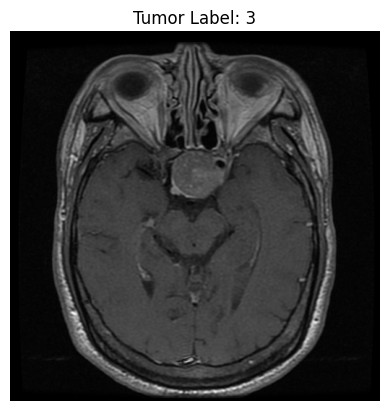

In [11]:
print("Image shape:", image.shape)
print("Label:", label)

plt.imshow(image, cmap='gray')
plt.title(f"Tumor Label: {label}")
plt.axis('off')
plt.show()